In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-24 19:32:42.778599: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 19:32:42.812768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 19:32:43.300264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/RJ_Reconstrucao_Pleuronectiformes_2024_08_20.xlsx')

df_Linguado = df[['Ano', 'Linguado_areia_art', 'Linguado_verdadeiro_art']].dropna().reset_index(drop=True)



for i in range(len(df_Linguado['Ano'])):
  df_Linguado.loc[i,'Soma'] = df_Linguado.loc[i,'Linguado_areia_art']+df_Linguado.loc[i,'Linguado_verdadeiro_art']
  
dados = df_Linguado[['Ano','Linguado_areia_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Linguado_areia_art'] = dados.loc[i,'Linguado_areia_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop= dados['Prop_Linguado_areia_art'].values
dados.head()


,Ano,Linguado_areia_art,Soma,Prop_Linguado_areia_art
0,2017,5.76147,9.96353,0.578256
1,2018,2.75330,5.31739,0.517792
2,2019,1.79110,6.81560,0.262794
3,2020,0.62260,5.14970,0.120900
4,2021,0.44130,3.93270,0.112213


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=5, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Desagragação Linguado_art/pesos prop Linguado_areia/.weights.h5', overwrite=True)

Epoch 1/5


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0185
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9751
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9435
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9094
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8715


In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Desagragação Linguado_art/pesos prop Linguado_areia/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.6323268 ]
 [0.62432647]
 [0.6163261 ]
 [0.60832566]
 [0.60032535]
 [0.59232485]
 [0.58432454]
 [0.57632416]
 [0.5683238 ]
 [0.56032336]
 [0.552323  ]
 [0.5443201 ]
 [0.5363118 ]
 [0.52830344]
 [0.48025367]
 [0.4722453 ]
 [0.46423703]
 [0.45622873]
 [0.4482203 ]
 [0.4402119 ]
 [0.4322034 ]
 [0.42419496]
 [0.4161865 ]
 [0.40817806]
 [0.4001696 ]
 [0.39216116]
 [0.3841524 ]
 [0.37613973]
 [0.36812708]
 [0.36011317]
 [0.35209092]
 [0.3440687 ]
 [0.33604646]
 [0.32802528]]


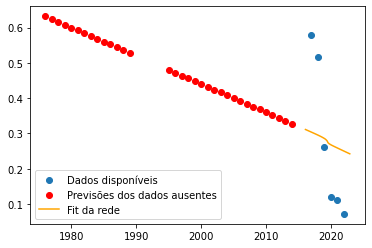

In [7]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

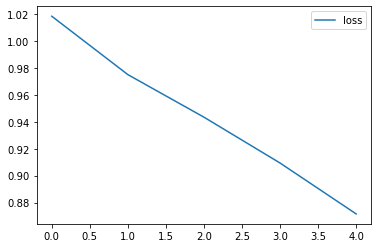

In [8]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [9]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_Linguado_areia_art',prev_continua)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
